In [62]:
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.cluster import KMeans
from numpy import unique
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from numpy import where
from sklearn.neighbors import KernelDensity
from scipy.signal import argrelextrema
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

In [2]:
keifiat = pd.read_excel('E:/university/data mining/dataset_2/keifiat.xlsx')

In [3]:
keifiat

,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages
0,3692,ماوس بی‌سیم لاجیتک مدل M325,IT,989472,0,0,verified,\N,NaN,واقعا عالیه. من که ازش خیلی راضیم,NaN,NaN
1,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3862150,4,1,verified,recommended,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]"
2,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,626843,1,0,verified,not_recommended,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN
3,120499,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,786887,6,11,verified,no_idea,گوشی مقرون به صرفه,همه چیز در رابطه با ظاهر این گوشی بسیار خوب اس...,"[""صفحه نمایش پرنور و با کیفیت\r"",""کیفیت بالای ...","[""کیفیت پایین اسپیکر\r"",""حاشیه خالی زیر صفحه ن..."
4,67200,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,854531,19,4,verified,no_idea,ابعاد، استحکام و نگهداری شارژ مناسب,اگر ظرفیتش براتون کافیه حتما بخرید.\r\nیه شارژ...,"[""ظریف و زیبا و باریک\r"",""بدنه محکم و با دوام""]","[""ظرفیت متوسط""]"
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,549845,شید آباژور آرام مدل SH45/01,TC,4979401,0,0,verified,recommended,بسیار تمیز و زیبا,بسیار تمیز و زیبا...من که خیلی راضیم,"[""کاملا مطابق با عکس\r"",""ساخت بسیار تمیز""]","[""ندارد""]"
99996,784160,کفش مخصوص دویدن مردانه و زنانه آلبرتینی مدل دا...,FA,1066034,7,32,verified,\N,توصیه به خرید میکنم,من این کفش را برای پیاده روی اربعین خریدم از ی...,"[""سبک زیبا ارزان ""]","[""محل عبور بند کفش ها ایراد دارد""]"
99997,820985,واکس کفش ساتل مدل 20 حجم 60 میلی لیتر,FA,568208,0,0,verified,recommended,خوبه و غلیظه,واکس خوبیه..,"[""روغنیه""]","[""ندیدم""]"
99998,678073,کش رنگی مدادچوبی مدل 010 بسته 100,TC,981594,2,1,verified,no_idea,سلام,هیچ کدوم از این رنگهای که توی عکسه داخل بسته ن...,NaN,NaN


In [4]:
keifiat = keifiat.filter(['product_id','recommend'])
keifiat = keifiat[keifiat['recommend'] != '\\N']

In [5]:
keifiat

,product_id,recommend
1,90213,recommended
2,59473,not_recommended
3,120499,no_idea
4,67200,no_idea
5,133722,recommended
...,...,...
99994,400647,no_idea
99995,549845,recommended
99997,820985,recommended
99998,678073,no_idea


# converting catagorical data to numerical data suitable for clustering

In [6]:
rec = pd.get_dummies(keifiat['recommend'])
keifiat['no_idea'] = rec.loc[:,'no_idea']
keifiat['not_recommended'] = rec.loc[:, 'not_recommended']
keifiat['recommended'] = rec.loc[:, 'recommended']
keifiat

,product_id,recommend,no_idea,not_recommended,recommended
1,90213,recommended,0,0,1
2,59473,not_recommended,0,1,0
3,120499,no_idea,1,0,0
4,67200,no_idea,1,0,0
5,133722,recommended,0,0,1
...,...,...,...,...,...
99994,400647,no_idea,1,0,0
99995,549845,recommended,0,0,1
99997,820985,recommended,0,0,1
99998,678073,no_idea,1,0,0


In [7]:
keifiat = keifiat.filter(['product_id','recommended','not_recommended','no_idea'])
keifiat

,product_id,recommended,not_recommended,no_idea
1,90213,1,0,0
2,59473,0,1,0
3,120499,0,0,1
4,67200,0,0,1
5,133722,1,0,0
...,...,...,...,...
99994,400647,0,0,1
99995,549845,1,0,0
99997,820985,1,0,0
99998,678073,0,0,1


# preprocessed data done and Done!!

# get sum of recommendations for each product

In [8]:
keifiat = keifiat.groupby(['product_id']).sum().reset_index()
keifiat

,product_id,recommended,not_recommended,no_idea
0,1336,2,0,1
1,1482,1,0,0
2,1540,0,1,0
3,2535,1,0,0
4,2739,2,0,0
...,...,...,...,...
35456,892480,0,1,0
35457,897216,0,0,1
35458,897332,0,0,1
35459,897467,0,1,0


In [9]:
keifiat['no_idea'].value_counts()

0     26769
1      7551
2       789
3       216
4        73
5        23
6        13
7        11
9         5
19        3
8         3
15        2
16        1
14        1
11        1
Name: no_idea, dtype: int64

In [10]:
keifiat['not_recommended'].value_counts()

0     23642
1      9699
2      1307
3       422
4       145
5        79
6        62
7        40
8        13
11       10
10        9
9         8
13        4
14        3
16        2
23        2
33        1
37        1
31        1
30        1
12        1
15        1
17        1
18        1
21        1
22        1
24        1
26        1
27        1
43        1
Name: not_recommended, dtype: int64

In [11]:
keifiat['recommended'].value_counts()

1      16855
0      13038
2       3059
3       1068
4        482
5        287
6        170
7        118
8         81
9         55
10        51
11        32
12        24
13        22
14        17
16        14
15        12
18         8
27         7
21         6
20         5
17         5
24         5
19         5
25         4
28         3
26         3
22         2
34         2
31         2
47         2
42         2
53         1
57         1
97         1
44         1
30         1
139        1
35         1
68         1
54         1
100        1
43         1
38         1
23         1
39         1
72         1
Name: recommended, dtype: int64

# as you see data values are terrible for clustering so we should normalize them

# When normalizing we simply subtract the mean and divide by standard deviation.
Normalization using pandas (Gives unbiased estimates)

In [12]:
cols_to_norm = ['no_idea','not_recommended','recommended']
keifiat[cols_to_norm] = keifiat[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
keifiat

,product_id,recommended,not_recommended,no_idea
0,1336,0.014388,0.000000,0.052632
1,1482,0.007194,0.000000,0.000000
2,1540,0.000000,0.023256,0.000000
3,2535,0.007194,0.000000,0.000000
4,2739,0.014388,0.000000,0.000000
...,...,...,...,...
35456,892480,0.000000,0.023256,0.000000
35457,897216,0.000000,0.000000,0.052632
35458,897332,0.000000,0.000000,0.052632
35459,897467,0.000000,0.023256,0.000000


# we should convert our datset to array in order to be used in clustering methods

In [13]:
scaled_features=keifiat.filter(['recommended','not_recommended','no_idea'])

In [14]:
scaled_features=scaled_features.to_numpy()
scaled_features

array([[0.01438849, 0.        , 0.05263158],
       [0.00719424, 0.        , 0.        ],
       [0.        , 0.02325581, 0.        ],
       ...,
       [0.        , 0.        , 0.05263158],
       [0.        , 0.02325581, 0.        ],
       [0.        , 0.        , 0.05263158]])

# Choosing the Appropriate Number of Clusters
The elbow method

The elbow method and the silhouette coefficient are often used as complementary evaluation techniques rather than one being preferred over the other. To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:

In [15]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}
# A list holds the SSE values for each k
sse = []
for k in range(1, 15):
    modele = KMeans(n_clusters=k, **kmeans_kwargs)
    modele.fit(scaled_features)
    sse.append(modele.inertia_)

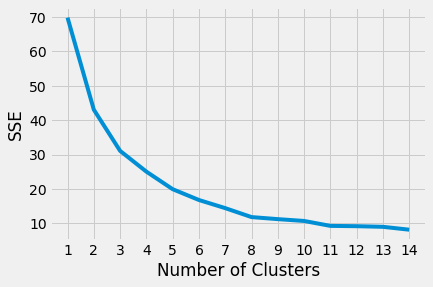

In [16]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

The silhouette coefficient is a measure of cluster cohesion and separation.
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [19]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(8, 15):
    modele = KMeans(n_clusters=k, **kmeans_kwargs)
    modele.fit(scaled_features)
    score = silhouette_score(scaled_features, modele.labels_)
    silhouette_coefficients.append(score)

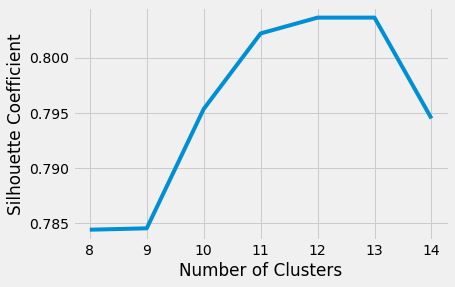

In [23]:
plt.style.use("fivethirtyeight")
plt.plot(range(8, 15), silhouette_coefficients)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# so the best number of clusters is 13

# now we do kmeans clustering

In [41]:
modell =KMeans(
init="random",
n_clusters=13,
n_init=10,
max_iter=300
)

In [42]:
modell.fit(scaled_features)

KMeans(init='random', n_clusters=13)

In [43]:
# The lowest SSE value
modell.inertia_

8.644436887631427

In [44]:
# Final locations of the centroid
modell.cluster_centers_

array([[ 8.09128147e-03, -3.33066907e-16,  1.59594560e-16],
       [ 5.75539568e-02,  5.34883721e-01,  1.00000000e+00],
       [ 8.05755396e-01,  2.09302326e-01,  8.59649123e-01],
       [ 9.74920998e-03,  8.52858074e-02,  1.61337924e-02],
       [ 1.71597216e-02,  1.78657287e-02,  1.19638051e-01],
       [ 2.11381283e-03,  2.55543537e-02,  2.60208521e-16],
       [ 3.00782804e-02,  3.77062401e-03, -4.16333634e-17],
       [ 3.65467626e-02,  1.86744186e-01,  1.16315789e-01],
       [ 1.28510890e-01,  8.56960816e-02,  2.76135544e-01],
       [ 4.09699758e-03,  4.27167194e-03,  5.26315789e-02],
       [ 8.56769130e-02,  6.70190275e-01,  2.44019139e-01],
       [ 3.59712230e-01,  2.32558140e-01,  7.89473684e-01],
       [ 9.92805755e-02,  3.61918605e-02,  7.63157895e-02]])

In [45]:
# The number of iterations required to converge
modell.n_iter_

38

In [46]:
modell.labels_

array([9, 0, 5, ..., 9, 5, 9])

In [47]:
keifiat['cluster'] = modell.labels_

In [48]:
keifiat

,product_id,recommended,not_recommended,no_idea,cluster
0,1336,0.014388,0.000000,0.052632,9
1,1482,0.007194,0.000000,0.000000,0
2,1540,0.000000,0.023256,0.000000,5
3,2535,0.007194,0.000000,0.000000,0
4,2739,0.014388,0.000000,0.000000,0
...,...,...,...,...,...
35456,892480,0.000000,0.023256,0.000000,5
35457,897216,0.000000,0.000000,0.052632,9
35458,897332,0.000000,0.000000,0.052632,9
35459,897467,0.000000,0.023256,0.000000,5


In [84]:
keifiat.groupby(by=['cluster']).first()

,product_id,recommended,not_recommended,no_idea
cluster,,,,
0,1482,0.007194,0.000000,0.000000
1,254346,0.057554,0.534884,1.000000
2,111178,0.697842,0.255814,0.736842
3,5289,0.028777,0.069767,0.052632
4,5956,0.000000,0.000000,0.105263
5,1540,0.000000,0.023256,0.000000
6,5435,0.021583,0.000000,0.000000
7,7793,0.028777,0.325581,0.157895
8,20388,0.086331,0.046512,0.210526


our data is successfully clustered

In [49]:
yhat = modell.predict(scaled_features)
clusters = np.unique(yhat)
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

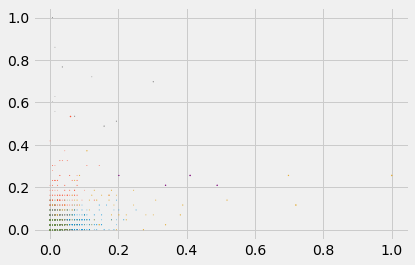

In [50]:
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(scaled_features[row_ix, 0],scaled_features[row_ix, 1],scaled_features[row_ix, 2])
plt.show()

# GaussianMixture clustering

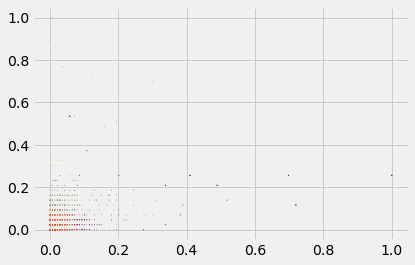

In [34]:
# define the model
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=13)
# fit the model
model.fit(scaled_features)
# assign a cluster to each example
yhat = model.predict(scaled_features)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
  # get row indexes for samples with this cluster
  row_ix = where(yhat == cluster)
  # create scatter of these samples
  plt.scatter(scaled_features[row_ix, 0], scaled_features[row_ix, 1],scaled_features[row_ix, 2])
# show the plot
plt.show()

# MiniBatchKMeans clustering

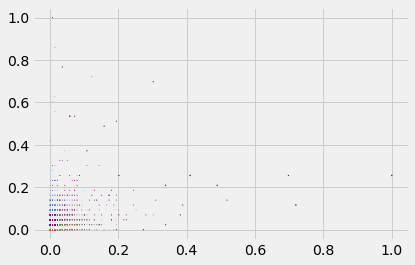

In [35]:
# mini-batch k-means clustering
from sklearn.cluster import MiniBatchKMeans
# define the model
model = MiniBatchKMeans(n_clusters=13)
# fit the model
model.fit(scaled_features)
# assign a cluster to each example
yhat = model.predict(scaled_features)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(scaled_features[row_ix, 0],scaled_features[row_ix, 1],scaled_features[row_ix, 2])
# show the plot
plt.show()

# DBSCAN clustering

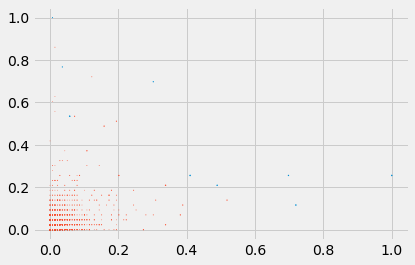

In [36]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.30, min_samples=9)
yhat = model.fit_predict(scaled_features)
clusters = unique(yhat)
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(scaled_features[row_ix, 0],scaled_features[row_ix, 1],scaled_features[row_ix, 2])
plt.show()

# AgglomerativeClustering clustering

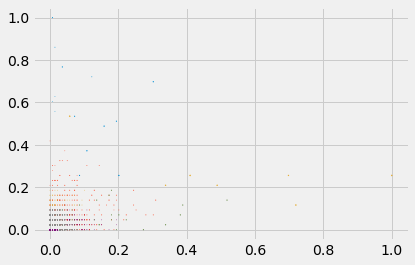

In [37]:
# agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
# define the model
model = AgglomerativeClustering(n_clusters=13)
# fit model and predict clusters
yhat = model.fit_predict(scaled_features)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(scaled_features[row_ix, 0],scaled_features[row_ix, 1],scaled_features[row_ix, 2])
# show the plot
plt.show()

# first part done:)))))))))) base dige:/

In [51]:
orders = pd.read_csv('E:/university/data mining/dataset_2/orders.csv')
orders

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0
...,...,...,...,...,...,...,...
199995,12172771,4403268,445940,2018-04-03 12:07:01.000,344037.0,تهران,2.0
199996,4425393,3745774,131645,2016-07-09 19:14:09.000,600000.0,محمدیه,1.0
199997,6671889,4845514,215045,2017-03-08 23:47:06.000,450000.0,اصفهان,1.0
199998,6315995,2541418,264021,2017-02-08 14:59:39.000,193486.0,همدان,1.0


In [52]:
orders = orders.filter(['city_name_fa','Quantity_item'])
orders = orders.groupby(['city_name_fa']).sum().reset_index()
orders

,city_name_fa,Quantity_item
0,آب بر,15.0
1,آبادان,493.0
2,آباده,84.0
3,آباده طشک,3.0
4,آبدان,2.0
...,...,...
901,گیوی,18.0
902,یاسوج,335.0
903,یاسوکند,2.0
904,یامچی,1.0


# since our data is one dimensional we should first do kernel density so that we can find maxima and minima in order to find number of clusters and then do kmeans

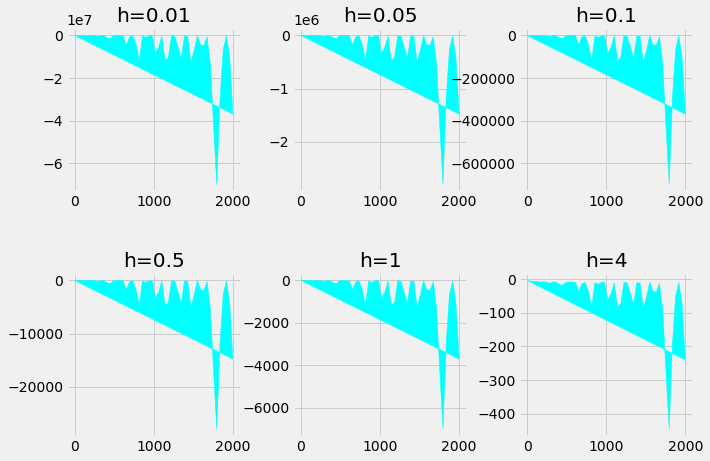

In [63]:
bandwidths = [0.01, 0.05, 0.1, 0.5, 1, 4]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10, 7))
plt_ind = np.arange(6) + 231

for b, ind in zip(bandwidths, plt_ind):
    kde_model = KernelDensity(kernel='gaussian', bandwidth=b)
    kde_model.fit(x_train)
    score = kde_model.score_samples(x_test.reshape(-1,1))
    plt.subplot(ind)
    plt.fill(x_test, (score), c='cyan')
    plt.title("h="+str(b))

fig.subplots_adjust(hspace=0.5, wspace=.3)
plt.show()

# now im trying to find the best bandwidth:/

In [64]:
bandwidth = np.arange(2,6,.05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([2.  , 2.05, 2.1 , 2.15, 2.2 , 2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 ,
       2.55, 2.6 , 2.65, 2.7 , 2.75, 2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05,
       3.1 , 3.15, 3.2 , 3.25, 3.3 , 3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 ,
       3.65, 3.7 , 3.75, 3.8 , 3.85, 3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15,
       4.2 , 4.25, 4.3 , 4.35, 4.4 , 4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 ,
       4.75, 4.8 , 4.85, 4.9 , 4.95, 5.  , 5.05, 5.1 , 5.15, 5.2 , 5.25,
       5.3 , 5.35, 5.4 , 5.45, 5.5 , 5.55, 5.6 , 5.65, 5.7 , 5.75, 5.8 ,
       5.85, 5.9 , 5.95])})

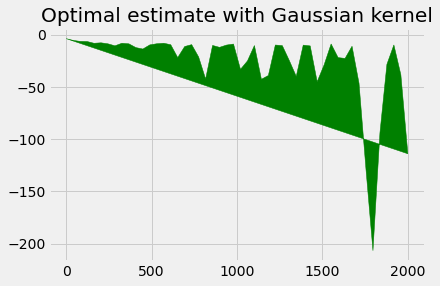

optimal bandwidth: 5.95


In [65]:
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test.reshape(-1,1))
plt.fill(x_test, (log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

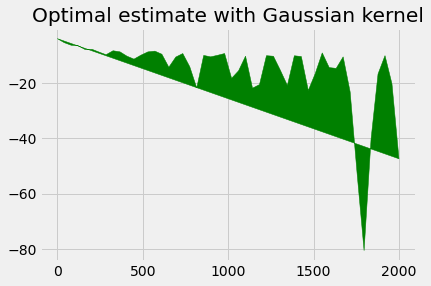

optimal bandwidth: 9.95


In [66]:
bandwidth = np.arange(6, 10, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test.reshape(-1,1))
plt.fill(x_test, (log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

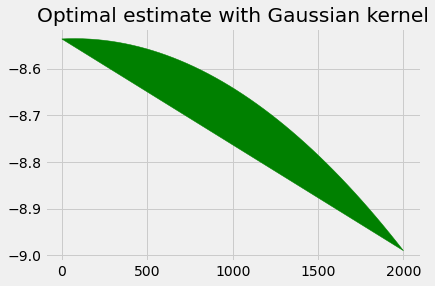

optimal bandwidth: 2000.00


In [67]:
bandwidth = np.arange(1996, 2000.05, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test.reshape(-1,1))
plt.fill(x_test, (log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

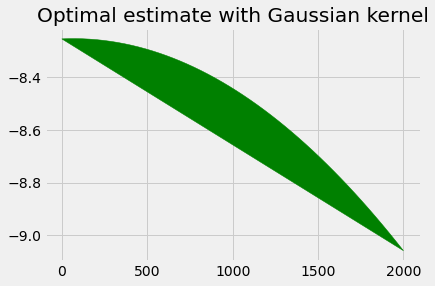

optimal bandwidth: 1503.95


In [68]:
bandwidth = np.arange(1500, 1504, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test.reshape(-1,1))
plt.fill(x_test, (log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

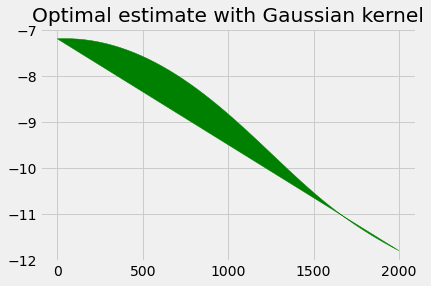

optimal bandwidth: 503.95


In [69]:
bandwidth = np.arange(500, 504, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test.reshape(-1,1))
plt.fill(x_test, (log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

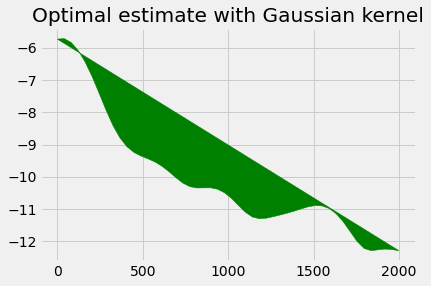

optimal bandwidth: 103.95


In [70]:
bandwidth = np.arange(100, 104, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test.reshape(-1,1))
plt.fill(x_test, (log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

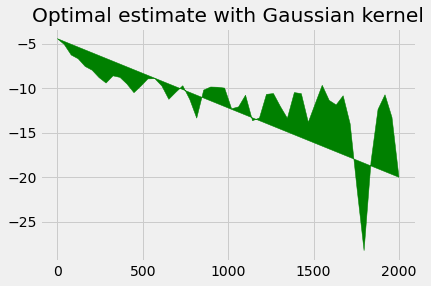

optimal bandwidth: 19.95


In [71]:
bandwidth = np.arange(16, 20, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test.reshape(-1,1))
plt.fill(x_test, (log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

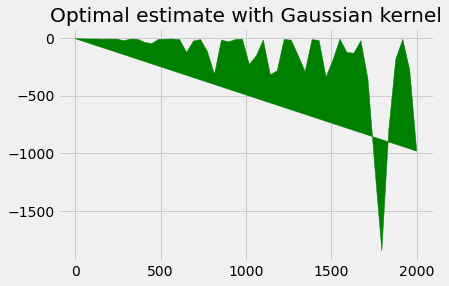

optimal bandwidth: 1.95


In [72]:
bandwidth = np.arange(0.05, 2, .05)
kde = KernelDensity(kernel='gaussian')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(x_train)
kde = grid.best_estimator_
log_dens = kde.score_samples(x_test.reshape(-1,1))
plt.fill(x_test, (log_dens), c='green')
plt.title('Optimal estimate with Gaussian kernel')
plt.show()
print("optimal bandwidth: " + "{:.2f}".format(kde.bandwidth))

# we dont want our plot to be too smooth or too detailed. so 1.95 is the best bandwidth:))  HAH

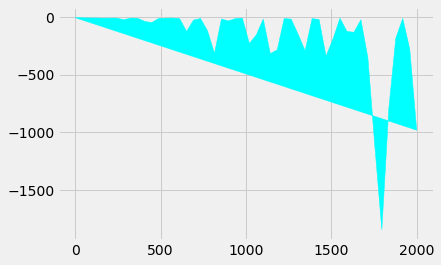

In [73]:
x_train = np.array(orders['Quantity_item'].tolist())
x_train = x_train.reshape(-1, 1)
x_test = np.linspace(-1,2000)
model = KernelDensity(bandwidth=1.95)
model.fit(x_train)
log_dens = model.score_samples(x_test.reshape(-1,1))
plt.fill(x_test,log_dens,c='cyan')
plt.show()

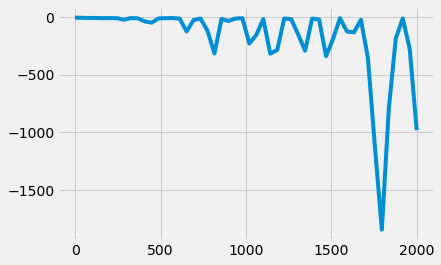

In [74]:
plt.plot(x_test,log_dens)

# lets find local minimas and maximas to find out the best number of clusters!

In [85]:
# first argument can a multidimentional np array as
# data : ndarray
# Array in which to find the relative extrema.
# This is reflected in what gets returned:
#Returns
#    -------
#    extrema : ndarray
#        Boolean array of the same shape
# That is why at the end of the line we just take the first element
# order: How many points on each side to use for the comparison to consider
minima = argrelextrema(log_dens, np.less_equal)[0]
maxima = argrelextrema(log_dens, np.greater_equal)[0]

In [86]:
print(minima)

[ 4  7 11 16 20 22 25 28 33 36 40 44 49]


In [87]:
print(maxima)

[ 0  5  8 14 18 21 24 27 30 34 38 41 47]


# here you can see local maximas.They are the little orange crosses.Notice there are 13 of them?! :)  SUCH A WOW

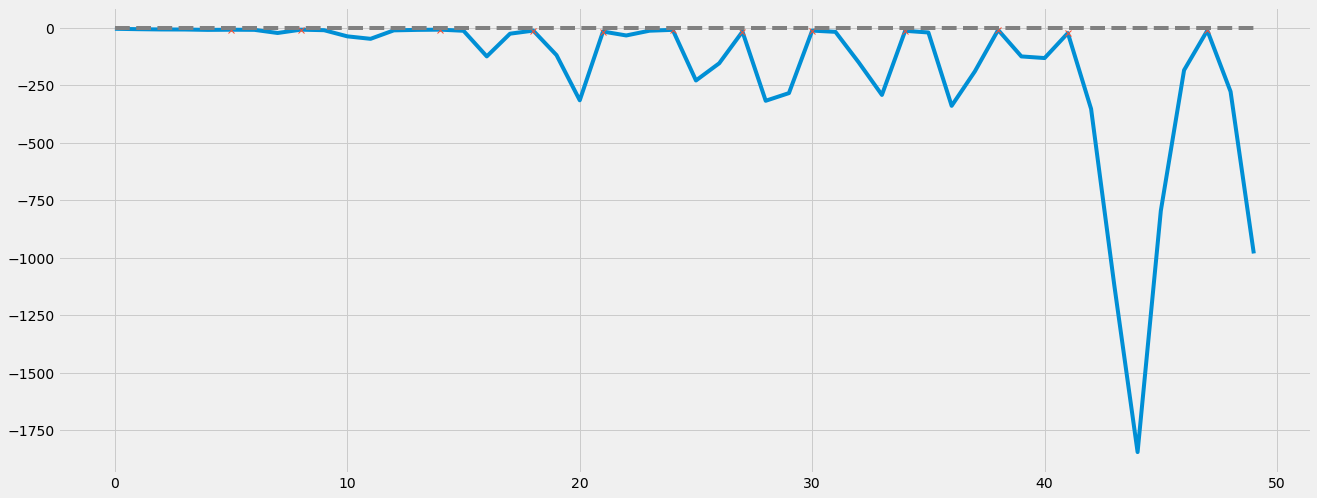

In [88]:
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(log_dens,height=(None, 0))
plt.figure(figsize=(20,8))
plt.plot(log_dens)
plt.plot(peaks, log_dens[peaks], "x")
plt.plot(np.zeros_like(log_dens), "--", color="gray")
plt.show()

In [89]:
scaled2=orders.filter(['Quantity_item']).to_numpy()
scaled2

array([[1.50000e+01],
       [4.93000e+02],
       [8.40000e+01],
       [3.00000e+00],
       [2.00000e+00],
       [5.20000e+01],
       [8.00000e+00],
       [4.00000e+00],
       [3.00000e+00],
       [1.80000e+01],
       [2.00000e+00],
       [1.50000e+01],
       [1.00000e+00],
       [1.10000e+02],
       [1.00000e+00],
       [3.10000e+01],
       [1.40000e+01],
       [7.10000e+01],
       [6.00000e+01],
       [1.00000e+00],
       [1.35000e+02],
       [1.10000e+01],
       [2.09000e+02],
       [2.00000e+00],
       [1.50000e+01],
       [4.20000e+01],
       [5.00000e+00],
       [4.70000e+01],
       [2.00000e+00],
       [3.00000e+00],
       [1.27300e+03],
       [2.00000e+00],
       [1.00000e+00],
       [5.70000e+01],
       [9.00000e+00],
       [1.76000e+02],
       [1.00000e+00],
       [2.00000e+00],
       [7.00000e+00],
       [5.00000e+00],
       [1.00000e+01],
       [2.00000e+00],
       [1.00000e+00],
       [1.00000e+00],
       [1.22900e+03],
       [3.

# KMeans again...

In [90]:
modell =KMeans(
init="random",
n_clusters=13,
n_init=10,
max_iter=300
)

In [91]:
modell.fit(scaled2)

KMeans(init='random', n_clusters=13)

In [92]:
orders['cluster'] = modell.labels_
orders

,city_name_fa,Quantity_item,cluster
0,آب بر,15.0,10
1,آبادان,493.0,2
2,آباده,84.0,6
3,آباده طشک,3.0,8
4,آبدان,2.0,1
...,...,...,...
901,گیوی,18.0,10
902,یاسوج,335.0,0
903,یاسوکند,2.0,1
904,یامچی,1.0,1


In [93]:
orders.groupby(by=['cluster']).first()

,city_name_fa,Quantity_item
cluster,,
0,آستانه اشرفیه,209.0
1,آبدان,2.0
2,آبادان,493.0
3,آمل,1273.0
4,آبسرد,8.0
5,تهران,136538.0
6,آباده,84.0
7,آبدانان,52.0
8,آباده طشک,3.0


# it is obvious that 13 culsters is terrible! what????
so lets try less clusters:)

In [96]:
modell =KMeans(
init="random",
n_clusters=12,
n_init=10,
max_iter=300
)
modell.fit(scaled2)
orders['cluster'] = modell.labels_
orders.groupby(by=['cluster']).first()

,city_name_fa,Quantity_item
cluster,,
0,اردبیل,979.0
1,آباده,84.0
2,آمل,1273.0
3,آباده طشک,3.0
4,اصفهان,7552.0
5,آبپخش,18.0
6,آبدانان,52.0
7,آب بر,15.0
8,تبریز,3512.0


In [97]:
modell =KMeans(
init="random",
n_clusters=11,
n_init=10,
max_iter=300
)
modell.fit(scaled2)
orders['cluster'] = modell.labels_
orders.groupby(by=['cluster']).first()

,city_name_fa,Quantity_item
cluster,,
0,آبپخش,18.0
1,تهران,136538.0
2,اصفهان,7552.0
3,آباده,84.0
4,آمل,1273.0
5,آبدانان,52.0
6,آب بر,15.0
7,آستانه اشرفیه,209.0
8,آبادان,493.0


In [99]:
modell =KMeans(
init="random",
n_clusters=10,
n_init=10,
max_iter=300
)
modell.fit(scaled2)
orders['cluster'] = modell.labels_
orders.groupby(by=['cluster']).first()

,city_name_fa,Quantity_item
cluster,,
0,آباده طشک,3.0
1,تهران,136538.0
2,آباده,84.0
3,آب بر,15.0
4,آبادان,493.0
5,اصفهان,7552.0
6,اهواز,5559.0
7,تبریز,3512.0
8,آمل,1273.0


In [100]:
modell =KMeans(
init="random",
n_clusters=9,
n_init=10,
max_iter=300
)
modell.fit(scaled2)
orders['cluster'] = modell.labels_
orders.groupby(by=['cluster']).first()

,city_name_fa,Quantity_item
cluster,,
0,آب بر,15.0
1,اصفهان,7552.0
2,آبدانان,52.0
3,آستانه اشرفیه,209.0
4,آباده,84.0
5,آبادان,493.0
6,تبریز,3512.0
7,آمل,1273.0
8,تهران,136538.0


In [101]:
modell =KMeans(
init="random",
n_clusters=8,
n_init=10,
max_iter=300
)
modell.fit(scaled2)
orders['cluster'] = modell.labels_
orders.groupby(by=['cluster']).first()

,city_name_fa,Quantity_item
cluster,,
0,آمل,1273.0
1,آبادان,493.0
2,تبریز,3512.0
3,آب بر,15.0
4,آباده,84.0
5,تهران,136538.0
6,اصفهان,7552.0
7,آستارا,135.0


In [102]:
modell =KMeans(
init="random",
n_clusters=7,
n_init=10,
max_iter=300
)
modell.fit(scaled2)
orders['cluster'] = modell.labels_
orders.groupby(by=['cluster']).first()

,city_name_fa,Quantity_item
cluster,,
0,آبادان,493.0
1,آمل,1273.0
2,آب بر,15.0
3,آباده,84.0
4,تهران,136538.0
5,اصفهان,7552.0
6,تبریز,3512.0


In [103]:
modell =KMeans(
init="random",
n_clusters=6,
n_init=10,
max_iter=300
)
modell.fit(scaled2)
orders['cluster'] = modell.labels_
orders.groupby(by=['cluster']).first()

,city_name_fa,Quantity_item
cluster,,
0,آمل,1273.0
1,آب بر,15.0
2,تهران,136538.0
3,آبادان,493.0
4,تبریز,3512.0
5,اصفهان,7552.0


In [104]:
modell =KMeans(
init="random",
n_clusters=5,
n_init=10,
max_iter=300
)
modell.fit(scaled2)
orders['cluster'] = modell.labels_
orders.groupby(by=['cluster']).first()

,city_name_fa,Quantity_item
cluster,,
0,اصفهان,7552.0
1,تبریز,3512.0
2,آب بر,15.0
3,تهران,136538.0
4,آبادان,493.0


# 5 is okay:)lets go with 5.
    so our final number of clusters is 5 and the table above is our final result
#our 5 clusters are as follows:
#2:میزان فروش خیلی خلیلی کم
#4:میزان فروش بیشتر
#1:میزان فروش بیشتر از قبلی
#0:فروش خوب
#3:فروش عالییی

In [105]:
modell =KMeans(
init="random",
n_clusters=4,
n_init=10,
max_iter=300
)
modell.fit(scaled2)
orders['cluster'] = modell.labels_
orders.groupby(by=['cluster']).first()

,city_name_fa,Quantity_item
cluster,,
0,آمل,1273.0
1,آب بر,15.0
2,تهران,136538.0
3,اصفهان,7552.0


In [106]:
modell =KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300
)
modell.fit(scaled2)
orders['cluster'] = modell.labels_
orders.groupby(by=['cluster']).first()

,city_name_fa,Quantity_item
cluster,,
0,اصفهان,7552.0
1,آب بر,15.0
2,تهران,136538.0


In [109]:
modell =KMeans(
init="random",
n_clusters=2,
n_init=10,
max_iter=300
)
modell.fit(scaled2)
orders['cluster'] = modell.labels_
orders.groupby(by=['cluster']).first()

,city_name_fa,Quantity_item
cluster,,
0,تهران,136538.0
1,آب بر,15.0


bye bye...